In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

2025-11-06 10:38:55.631398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1762425535.951066      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1762425536.052397      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
df=yf.download('GOOGL',start='2010-01-01',end='2024-12-01')
print(df.head())
data=df['Close'].values.reshape(-1,1)

/tmp/ipykernel_37/567849746.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download('GOOGL',start='2010-01-01',end='2024-12-01')
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker          GOOGL      GOOGL      GOOGL      GOOGL      GOOGL
Date                                                             
2010-01-04  15.576998  15.645595  15.514616  15.581968   78169752
2010-01-05  15.508402  15.604089  15.447511  15.587685  120067812
2010-01-06  15.117455  15.554879  15.070234  15.554879  158988852
2010-01-07  14.765527  15.160700  14.729490  15.145787  256315428
2010-01-08  14.962370  14.992939  14.641509  14.713336  188783028


In [4]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(data)
train_size=int(len(scaled_data)*0.8)
train_data=scaled_data[:train_size]
test_data=scaled_data[train_size:]

In [6]:
def create_sequences(data,sequence_lenght):
    x,y=[],[]
    for i in range(len(data)-sequence_length):
        x.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(x),np.array(y)
sequence_length=60
x_train,y_train=create_sequences(train_data,sequence_length)
x_test,y_test=create_sequences(test_data,sequence_length)
print(f'x_train shape:{x_train.shape},y_train shape: {y_train.shape}')

x_train shape:(2942, 60, 1),y_train shape: (2942, 1)


In [10]:
model = Sequential([
    LSTM(50,return_sequences=True,input_shape=(sequence_length,1)),
    LSTM(50,return_sequences=False),
    Dense(25),
    Dense(1)
])
model.compile(optimizer='adam',loss='mean_squared_error')
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 60, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history=model.fit(x_train,y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 68ms/step - loss: 0.0095 - val_loss: 0.0011
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.2058e-04 - val_loss: 0.0014
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.2926e-04 - val_loss: 0.0011
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 1.1545e-04 - val_loss: 0.0014
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 1.2972e-04 - val_loss: 9.0135e-04
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 1.1934e-04 - val_loss: 9.9699e-04
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 9.2888e-05 - val_loss: 8.5579e-04
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 9.8285e-05 - val_loss: 7.6889e-04
Epoch 9/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - loss: 8.8655e-05 - val_loss: 7.8273e-04
Epoch 10/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 8.7688e-05 - val_loss: 0.0012


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


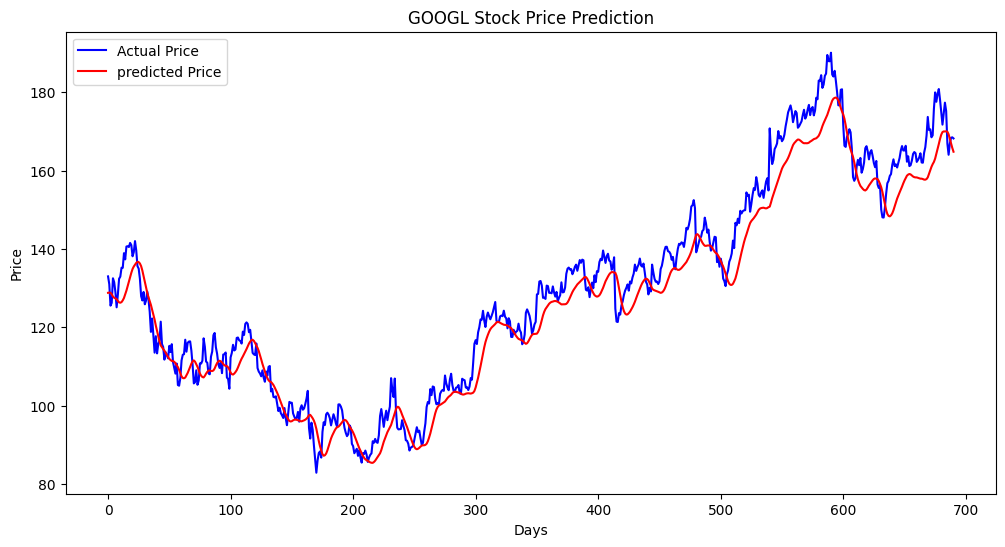

In [13]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
y_test_scaled=scaler.inverse_transform(y_test.reshape(-1,1))
plt.figure(figsize=(12,6))
plt.plot(y_test_scaled,label='Actual Price',color='blue')
plt.plot(predictions,label="predicted Price",color='red')
plt.title('GOOGL Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

In [14]:
last_sequence=scaled_data[-sequence_length:].reshape(1,sequence_length,1)
next_day_prediction=model.predict(last_sequence)
next_day_price=scaler.inverse_transform(next_day_prediction)
print(f"Predicted next day's price for GOOGL: ${next_day_price[0][0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Predicted next day's price for GOOGL: $163.97
